<a href="https://colab.research.google.com/github/LinkHS/Colab/blob/main/Open3D/Open3D_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open3D Visualize in Google Colab
This notebook will think about how to visualize Open3D in Google Colab.

## Install Open3D

In [ ]:
!pip install open3d

## Import Open3D and Numpy

In [2]:
import numpy as np
import open3d as o3d

## Read Point Cloud

In [3]:
!wget https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd

--2021-07-29 09:53:05--  https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [text/plain]
Saving to: ‘bunny.pcd’

bunny.pcd           100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-07-29 09:53:05 (103 MB/s) - ‘bunny.pcd’ saved [10878/10878]



In [4]:
cloud = o3d.io.read_point_cloud("bunny.pcd")
if cloud.is_empty(): exit()

## Estimate Normals

In [5]:
cloud.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

## Visualize using o3d.visualization.draw_geometries()
<code>o3d.visualization.draw_geometries()</code> is work fine outside Jupyter.  
But, it does not work inside Jupyter and Goolge Colab.

In [6]:
#o3d.visualization.draw_geometries([cloud])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


## Visualize using o3d.visualization.Visualizer()
<code>o3d.visualization.Visualizer()</code> is work fine outside Jupyter.  
But, it does not work inside Jupyter and Goolge Colab.

In [ ]:
#visualizer = o3d.visualization.Visualizer()
#visualizer.create_window(window_name="point cloud", width=1280, height=720, visible=False)
#visualizer.add_geometry(cloud)
#visualizer.run()

## Visualize using JVisualizer()
Opne3D added experimental support for Jupyter visualization with WebGL. <code>JVisualizer()</code> is work fine inside Jupyter at local.  
It is required with Open3D with feature enabled. It does not work in Goolge Colab.


In [ ]:
# from open3d import JVisualizer

#visualizer = JVisualizer()
#visualizer.add_geometry(cloud)
#visualizer.show()

## Visualize using o3d.visualization.Visualizer() with IPython.display
<code>o3d.visualization.Visualizer()</code> with <code>IPython.display</code> is work fine inside Jupyter. It displays image that captured viewer launched outside.  
But, it does not work in Goolge Colab.

In [ ]:
#import PIL.Image
#from IPython.display import display

#visualizer = o3d.visualization.Visualizer()
#visualizer.create_window(window_name="point cloud", width=1280, height=720, visible=False)
#visualizer.add_geometry(cloud)
#visualizer.update_geometry(cloud)
#visualizer.poll_events()
#image = visualizer.capture_screen_float_buffer()
#visualizer.destroy_window()
#image = (255.0 * np.asarray(image)).astype(np.uint8)
#display(PIL.Image.fromarray(image, "RGB"))

## Visualize using Matplotlib
In this section, it will visualize point cloud as a scatter plot using matplotlib.  
It works fine in inside Jupyter and Goolge Colab. But, it is image.


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
points = np.asarray(cloud.points)

In [ ]:
colors = None
if cloud.has_colors():
    colors = np.asarray(cloud.colors)
elif cloud.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
else:
    geometry.paint_uniform_color((1.0, 0.0, 0.0))
    colors = np.asarray(geometry.colors)

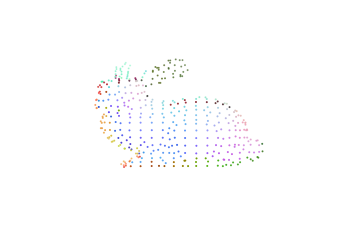

In [ ]:
# Single View
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

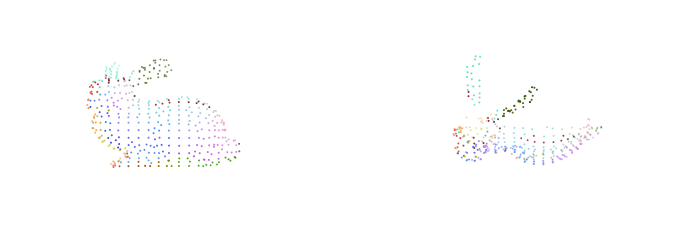

In [ ]:
# Multi View
figsize = plt.rcParams.get('figure.figsize')
fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax1.axis("off")
ax1.view_init(90, -90) # front view
ax1.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
ax2.axis("off")
ax2.view_init(90 + 90, -90) # top view
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

## Visualize with Plotly
In this section, it will visualize point cloud as a scatter plot using plotly. It is able to move viewpoint using mouse.  
It works fine in inside Jupyter and Goolge Colab. :thumbsup:

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], 
            mode='markers',
            marker=dict(size=1, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

As well as, You can visualize mesh using plotly in Google Colab.

In [ ]:
!wget https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj

--2021-03-03 04:20:22--  https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
Resolving graphics.stanford.edu (graphics.stanford.edu)... 171.67.77.70
Connecting to graphics.stanford.edu (graphics.stanford.edu)|171.67.77.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205917 (201K) [text/plain]
Saving to: ‘bunny.obj’

bunny.obj           100%[===================>] 201.09K   498KB/s    in 0.4s    

2021-03-03 04:20:22 (498 KB/s) - ‘bunny.obj’ saved [205917/205917]



In [ ]:
mesh = o3d.io.read_triangle_mesh("bunny.obj")
if mesh.is_empty(): exit()

In [ ]:
if not mesh.has_vertex_normals(): mesh.compute_vertex_normals()
if not mesh.has_triangle_normals(): mesh.compute_triangle_normals()

In [ ]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

In [ ]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=0.50)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

You can use Plotly like o3d.visualization.draw_geometries() for visualize Open3D geometries. 

In [ ]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()
        
        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)
            
            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)
        
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()

In [ ]:
o3d.visualization.draw_geometries = draw_geometries # replace function
o3d.visualization.draw_geometries([cloud])
o3d.visualization.draw_geometries([mesh])